<a href="https://colab.research.google.com/github/ShubhamSanap17/Problem-statements/blob/main/Trade%26Ahead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trade&Ahead - Problem Statement

The dataset consists of 340 rows and 15 columns. Below are the key attributes of the data:

Data Overview:
1. Ticker Symbol: Unique identifier for stocks.
2. Security: Full name of the company.
3. GICS Sector: Economic sector of the company.
4. GICS Sub Industry: Sub-sector classification.
5. Current Price: Stock price in dollars.
6. Price Change: Percentage price change over 13 weeks.
7. Volatility: Standard deviation of stock price over 13 weeks.
8. ROE: Return on Equity, a financial performance measure.
9. Cash Ratio: Company's cash to current liabilities ratio.
10. Net Cash Flow: Difference between inflows and outflows in dollars.
11. Net Income: Revenues minus expenses in dollars.
12. Earnings Per Share: Net profit per share in dollars.
13. Estimated Shares Outstanding: Total outstanding shares.
14. P/E Ratio: Price to earnings ratio.
15. P/B Ratio: Price to book value ratio.


#(Main source code)
**More deatils explaination please check below**



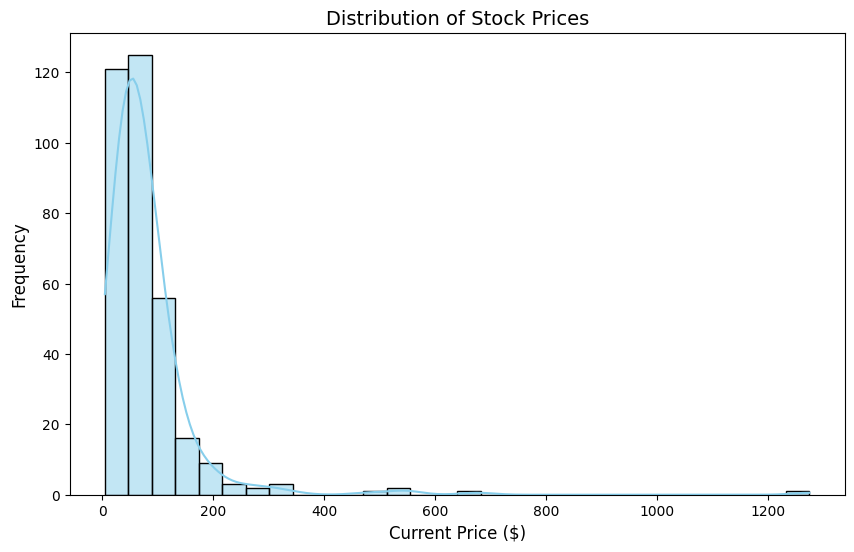

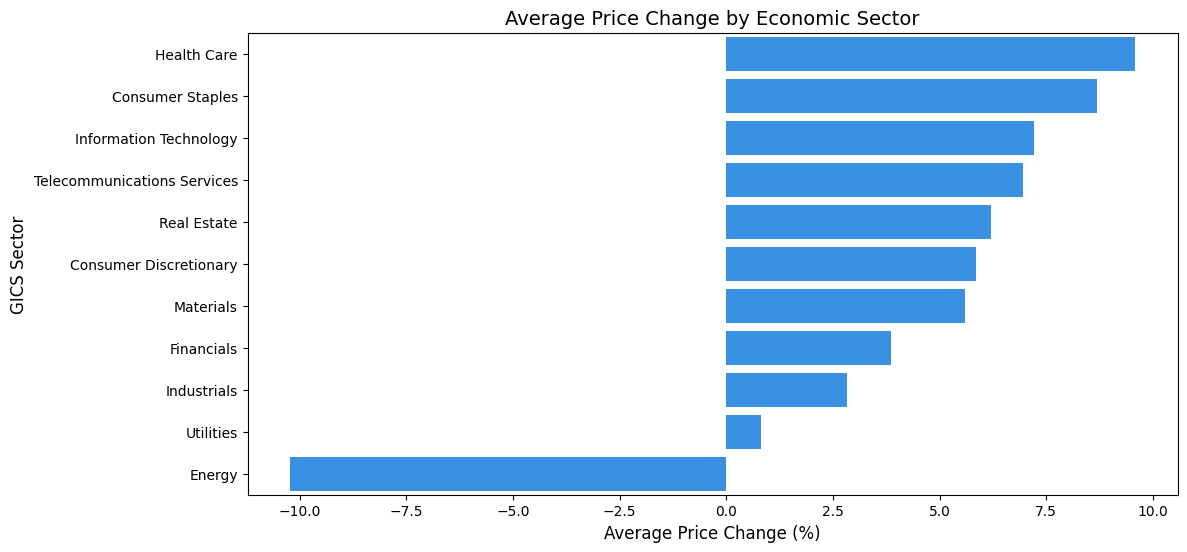

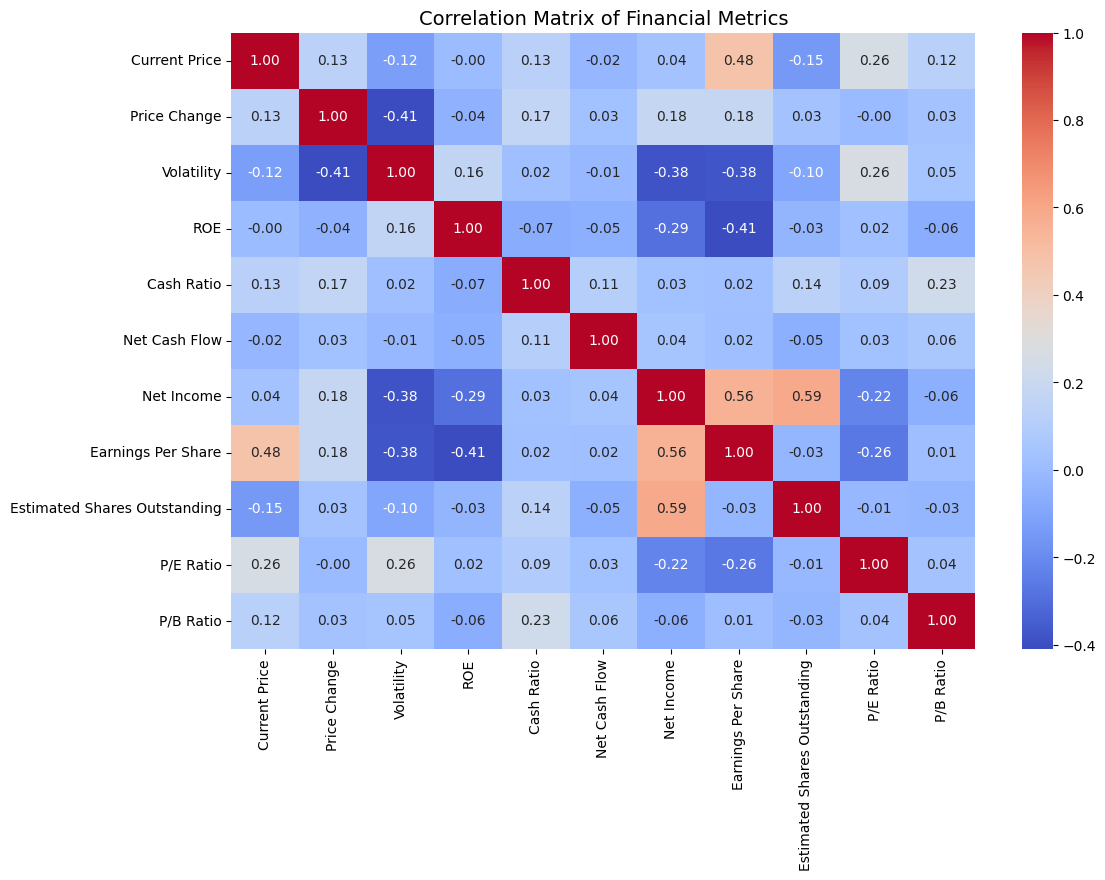

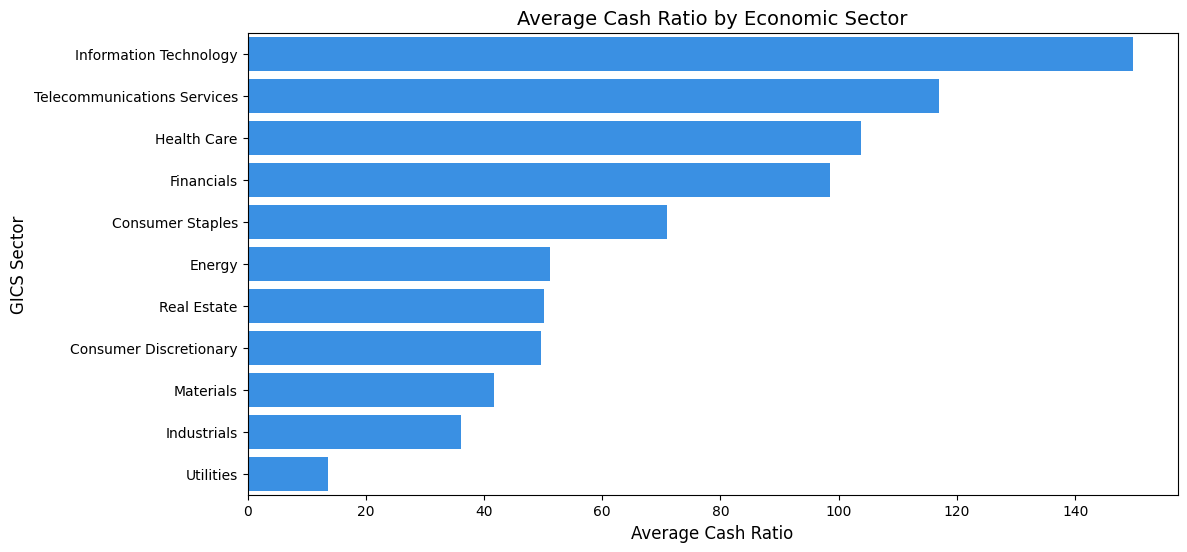

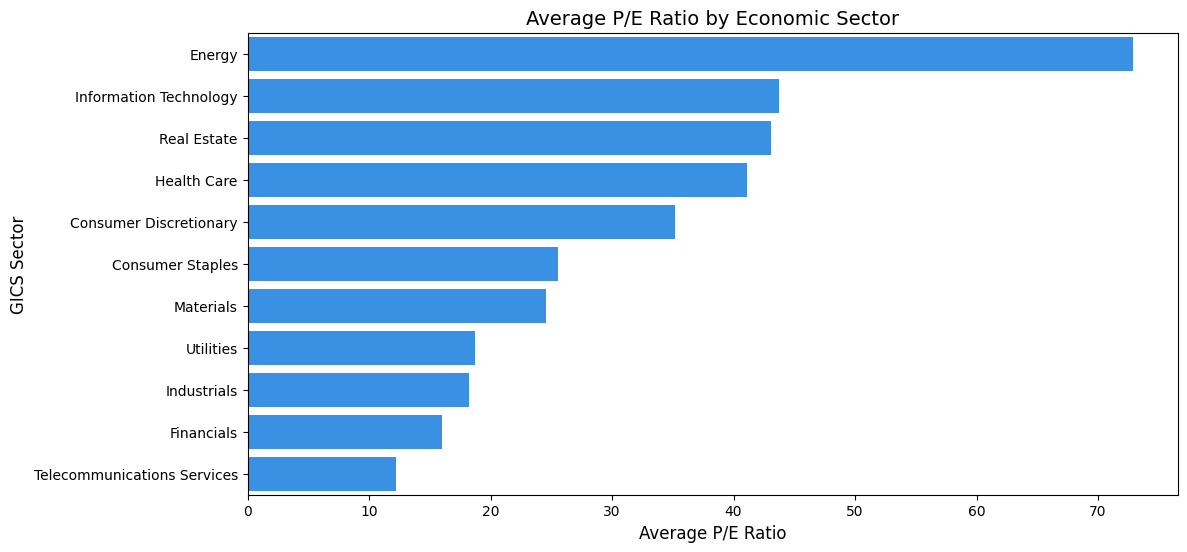

Number of duplicate rows: 0
Missing values per column:
Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64


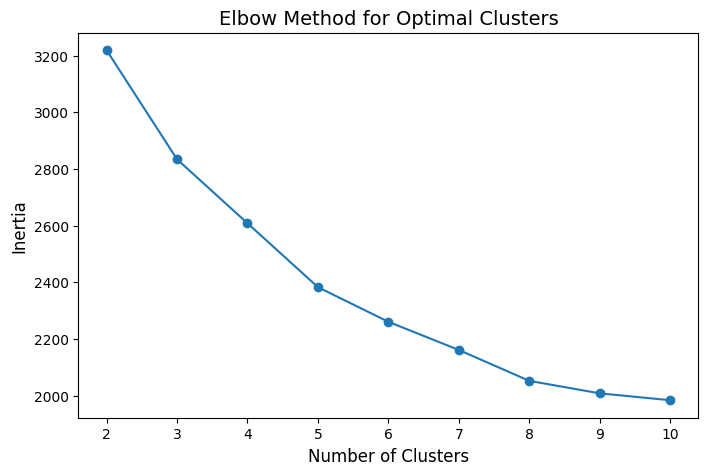

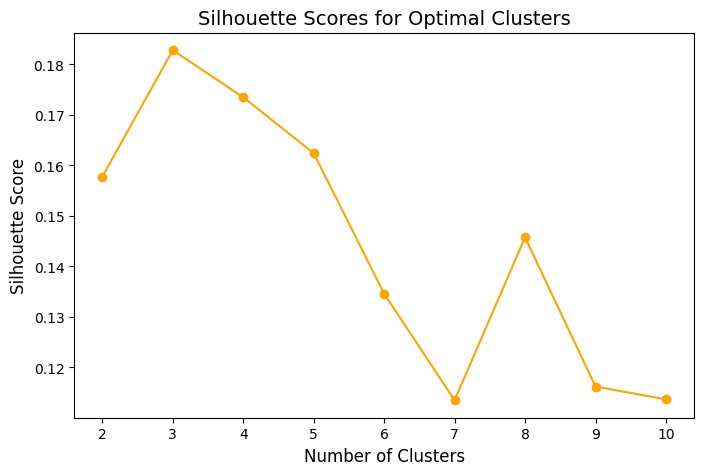

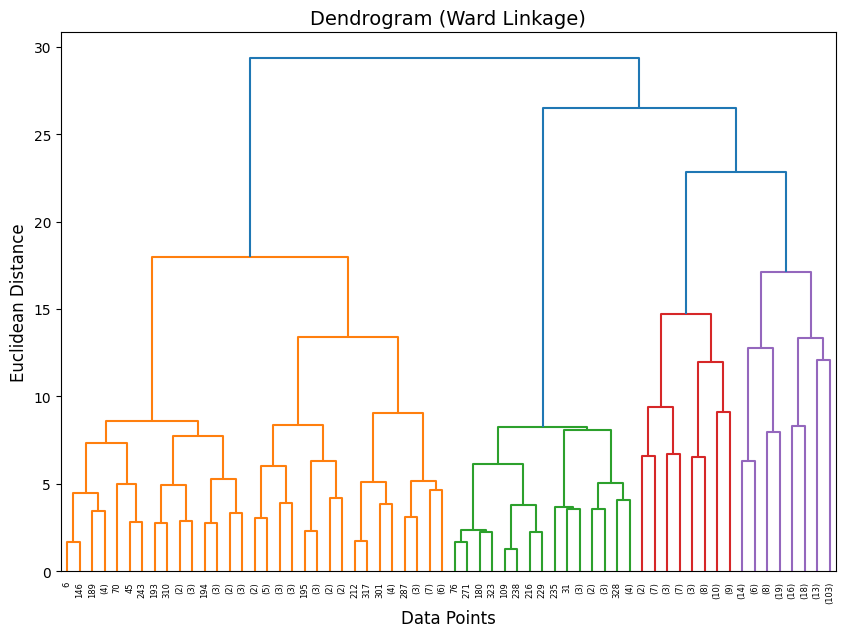

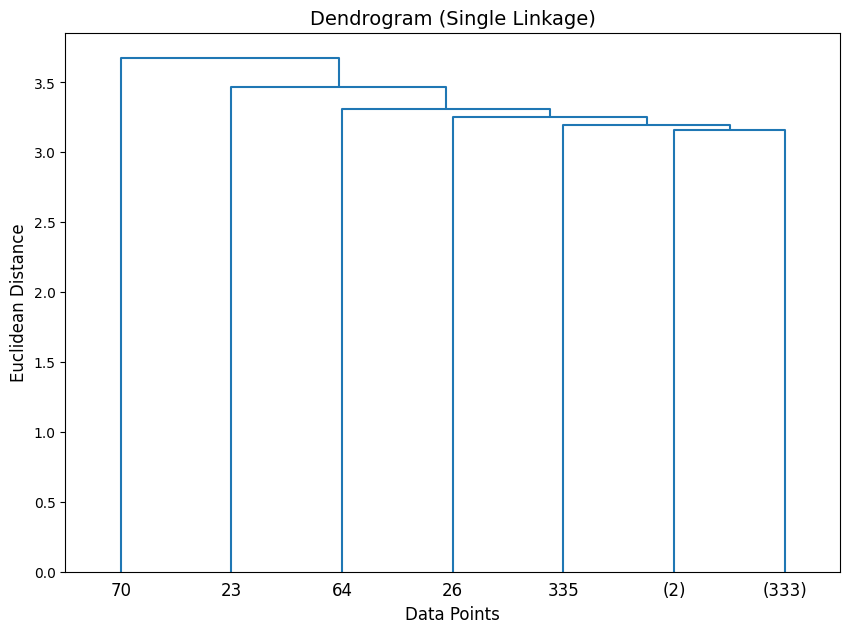

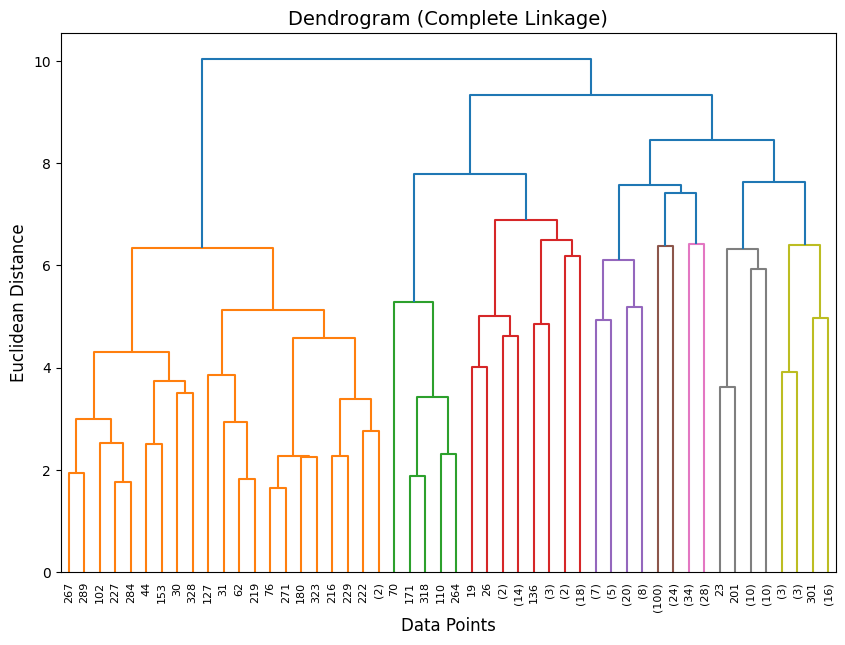

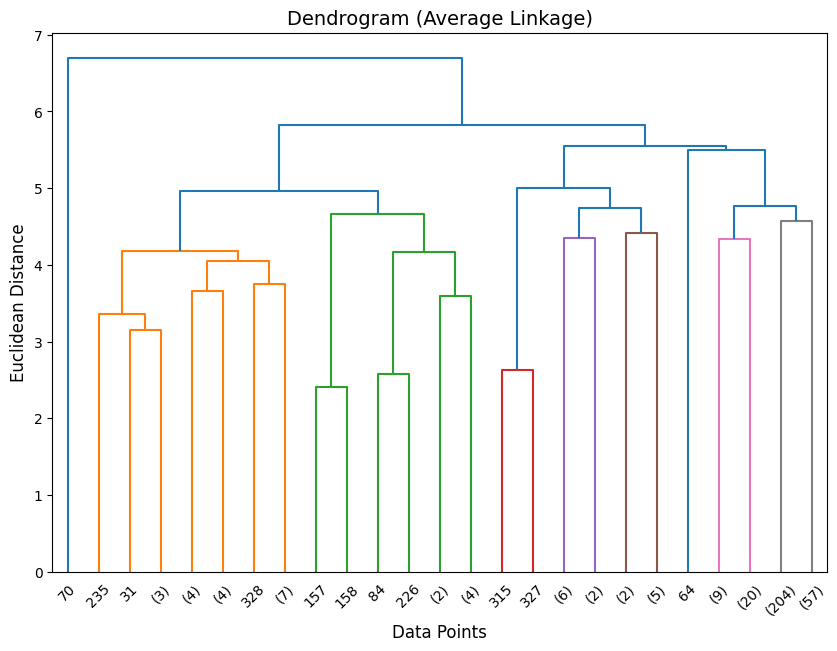

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/project 3/stock_data.csv'
stock_data = pd.read_csv(file_path)

# Exploratory Data Analysis

# Question 1: Distribution of stock prices
plt.figure(figsize=(10, 6))
sns.histplot(stock_data["Current Price"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Stock Prices", fontsize=14)
plt.xlabel("Current Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Question 2: Sector with maximum average price increase
avg_price_change_by_sector = stock_data.groupby("GICS Sector")["Price Change"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_change_by_sector.values, y=avg_price_change_by_sector.index, color="dodgerblue")
plt.title("Average Price Change by Economic Sector", fontsize=14)
plt.xlabel("Average Price Change (%)", fontsize=12)
plt.ylabel("GICS Sector", fontsize=12)
plt.show()

# Question 3: Correlation between variables
correlation_matrix = stock_data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Financial Metrics", fontsize=14)
plt.show()

# Question 4: Average cash ratio by economic sector
avg_cash_ratio_by_sector = stock_data.groupby("GICS Sector")["Cash Ratio"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_cash_ratio_by_sector.values, y=avg_cash_ratio_by_sector.index, color="dodgerblue")
plt.title("Average Cash Ratio by Economic Sector", fontsize=14)
plt.xlabel("Average Cash Ratio", fontsize=12)
plt.ylabel("GICS Sector", fontsize=12)
plt.show()

# Question 5: Average P/E ratio by economic sector
avg_pe_ratio_by_sector = stock_data.groupby("GICS Sector")["P/E Ratio"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_pe_ratio_by_sector.values, y=avg_pe_ratio_by_sector.index, color="dodgerblue")
plt.title("Average P/E Ratio by Economic Sector", fontsize=14)
plt.xlabel("Average P/E Ratio", fontsize=12)
plt.ylabel("GICS Sector", fontsize=12)
plt.show()

# Data Preprocessing

# Identifying numeric and categorical columns
numeric_cols = stock_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = stock_data.select_dtypes(include=['object']).columns

# Checking for duplicates
duplicates = stock_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Checking for missing values
missing_values = stock_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Handling missing values (median for numerical, mode for categorical)
stock_data[numeric_cols] = stock_data[numeric_cols].fillna(stock_data[numeric_cols].median())
for col in categorical_cols:
    stock_data[col] = stock_data[col].fillna(stock_data[col].mode()[0])

# Outlier Treatment using Winsorization
for col in numeric_cols:
    q1, q3 = stock_data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    stock_data[col] = np.clip(stock_data[col], lower_bound, upper_bound)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stock_data[numeric_cols])

# K-Means Clustering

# Elbow Method
inertia = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.show()

# Silhouette Scores
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color="orange")
plt.title("Silhouette Scores for Optimal Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.show()

# Applying K-Means with optimal clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
stock_data['KMeans Cluster'] = kmeans.fit_predict(scaled_data)

# Hierarchical Clustering

# Linkage Methods and Dendrograms
linkage_methods = ['ward', 'single', 'complete', 'average']
for method in linkage_methods:
    linked = linkage(scaled_data, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(linked, truncate_mode='level', p=5)
    plt.title(f"Dendrogram ({method.title()} Linkage)", fontsize=14)
    plt.xlabel("Data Points", fontsize=12)
    plt.ylabel("Euclidean Distance", fontsize=12)
    plt.show()


# 1. **Exploratory Data Analysis (EDA) **

# **Problem Definition, Questions to be Answered**
The problem is related to analyzing stock market data and performing clustering analysis. The questions addressed in the EDA are designed to gain insights into stock prices, sectors, and financial metrics:
- **What is the distribution of stock prices?**
- **Which sector has the maximum average price increase?**
- **What are the correlations between financial metrics?**
- **How do average cash ratios and P/E ratios vary by economic sector?**

# **Data Background and Contents**
The dataset is loaded from a CSV file containing stock data, and we assume it includes columns like stock prices, price changes, cash ratios, and P/E ratios, among others.

# **Univariate Analysis**
- **Distribution of Stock Prices**: The code visualizes the distribution of stock prices using a histogram and a KDE (Kernel Density Estimate) plot.
  
```python
sns.histplot(stock_data["Current Price"], kde=True, bins=30, color="skyblue")
```

#### **Bivariate Analysis**
- **Average Price Change by Economic Sector**: The code computes and plots the average price change for each sector.
  
```python
avg_price_change_by_sector = stock_data.groupby("GICS Sector")["Price Change"].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_change_by_sector.values, y=avg_price_change_by_sector.index, color="dodgerblue")
```
- **Correlation Matrix**: The code visualizes the correlation between numeric variables like stock price, P/E ratio, and cash ratio using a heatmap.
  
```python
correlation_matrix = stock_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
```

# **Insights Based on EDA**
- Insights from the distribution of stock prices, price changes, correlations, and sector-based metrics will provide business analysts with a better understanding of trends in the market.

---
# 2. **Data Preprocessing - **

# **Duplicate Value Check**
The code checks for duplicate rows in the dataset and prints the number of duplicates:

```python
duplicates = stock_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
```

# **Missing Values Check and Treatment**
The code checks for missing values and fills them using the median for numerical columns and the mode for categorical columns.

```python
stock_data[numeric_cols] = stock_data[numeric_cols].fillna(stock_data[numeric_cols].median())
for col in categorical_cols:
    stock_data[col] = stock_data[col].fillna(stock_data[col].mode()[0])
```

# **Outlier Check and Treatment**
The code treats outliers by using Winsorization (clipping the data to a specific range based on the interquartile range).

```python
for col in numeric_cols:
    q1, q3 = stock_data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    stock_data[col] = np.clip(stock_data[col], lower_bound, upper_bound)
```

# **Feature Scaling**
The code scales numerical features using `StandardScaler` to standardize the data for clustering:

```python
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stock_data[numeric_cols])
```

---

# 3. **K-means Clustering**

# **Apply K-means Clustering **
The code applies K-means clustering on the scaled data. The optimal number of clusters is determined using the Elbow method.

```python
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
stock_data['KMeans Cluster'] = kmeans.fit_predict(scaled_data)
```

# **Plot the Elbow Curve**
The Elbow method is used to visualize how the inertia (sum of squared distances) changes as the number of clusters increases. This helps determine the optimal number of clusters.

```python
inertia = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range_n_clusters, inertia, marker='o')
```

# **Check Silhouette Scores**
The Silhouette score is computed for different numbers of clusters. The silhouette score indicates how similar each point is to its own cluster compared to other clusters.

```python
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

plt.plot(range_n_clusters, silhouette_scores, marker='o', color="orange")
```

# **Cluster Profiling**
After applying K-means with the optimal number of clusters, profiling can be done by analyzing the characteristics of each cluster, e.g., average stock prices or financial ratios within each cluster.

---

# 4. **Hierarchical Clustering**

# **Apply Hierarchical Clustering with Different Linkage Methods**
The code applies Hierarchical Clustering using four linkage methods (`ward`, `single`, `complete`, `average`) and visualizes dendrograms for each.

```python
linkage_methods = ['ward', 'single', 'complete', 'average']
for method in linkage_methods:
    linked = linkage(scaled_data, method=method)
    dendrogram(linked, truncate_mode='level', p=5)
```

# **Plot Dendrograms for Each Linkage Method**
The dendrograms for different linkage methods help visualize how the data points are grouped together at various distance levels.

# **Check Cophenetic Correlation**
The cophenetic correlation measures how well the dendrogram preserves the pairwise distances between data points. This can be calculated for each linkage method to assess the clustering quality:

```python
coph_dists, coph_corr = cophenet(linked, pdist(scaled_data))
```

# **Cluster Profiling**
Like K-means, profiling can also be done for the clusters formed through Hierarchical Clustering by analyzing group characteristics.

---

# 5. **K-means vs Hierarchical Clustering**
This part involves comparing the clusters obtained from both K-means and Hierarchical Clustering. You can compare the number of clusters, cluster composition, and insights gained from both methods. The clusters can be compared based on metrics such as the size of the clusters or the average values of different financial ratios.

---

# 6. **Actionable Insights & Recommendations**
Based on the clustering analysis and the insights from EDA, actionable recommendations can be made. For example:
- **K-means clusters** could help identify which sectors perform better, and based on the analysis of stock prices, price changes, and financial ratios, recommendations can be made on which stocks or sectors to invest in.
- **Hierarchical Clustering** can provide deeper insights into hierarchical relationships between stocks, helping businesses identify broader market trends and make informed decisions.